# Beta Distribution
***
## 定义
beta分布可以看作一个概率的概率分布，当你不知道一个东西的具体概率是多少时，它可以给出所有概率出现的可能性大小    

举一个简单的例子，熟悉棒球运动的都知道有一个指标就是棒球击球率(batting average),就是用一个运动员击中的球数除以击球的总数，我们一般认为0.266是 正常水平的击球率，而如果击球率高达0.3就被认为是非常优秀的。现在有一个棒球运动员，我们希望能够预测他在这一赛季中的棒球击球率是多少。你可能就会直接计算棒球击球率，用击中的数除以击球数，但是如果这个棒球运动员只打了一次，而还命中了，那么他的击球率就是100%了，这显然是不合理的，因为根据棒球的历史信息，我们知道这个击球率应该是0.215到0.36之间才对。对于这个问题一个最好的方法就是用beta分布，这表示在我们没有看到这个运动员打球之前，我们就有了一个大概的范围。beta分布的定义域是(0,1)这就跟概率的范围是一样的。接下来我们将这些先验信息转换为beta分布的参数，我们知道一个击球率应该是平均0.27左右，而他的范围是0.21到0.35,那么根据这个信息，我们可以取$\alpha$=81，$\beta$=219 (击中81次，未击中219次)    

之所以取这两个参数是因为：    
- beta分布的均值是从图中可以看到这个分布主要落在了(0.2,0.35)间，这是从经验中得出的合理的范围。   
- 在这个例子里，我们的x轴就表示各个击球率的取值，x对应的y值就是这个击球率所时应的概率。也就是说beta分布可以看作一个概率的概率分布。   
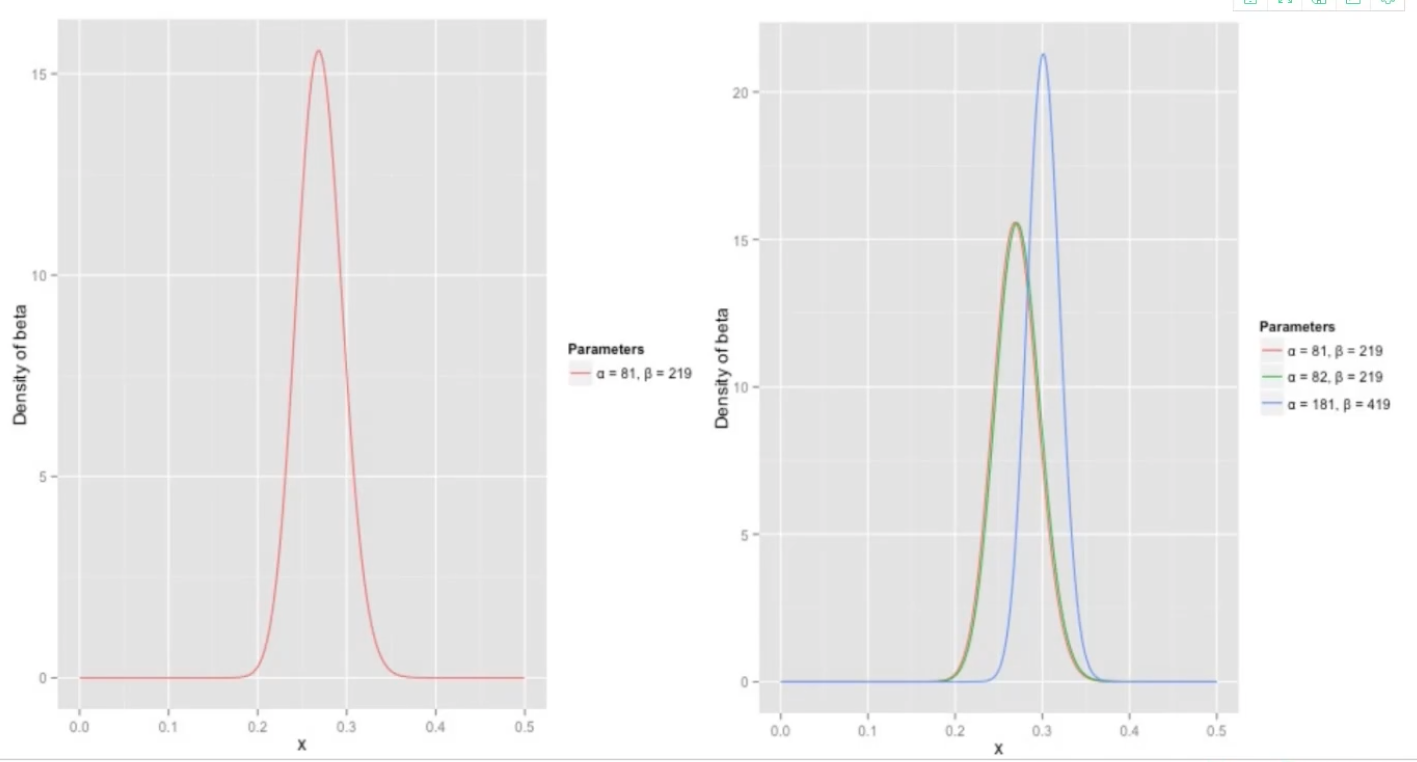   
- $\alpha$和$\beta$是一个开始的参数，在这里是81和219.当$\alpha$增加了1(又击中了一次)。$\beta$没有增加(没有漏球)。这就是我们的新的beta分布Beta(81+1,219)
- 可以看到这个分布其实没多大变化，这是因为只打了1次球并不能说明什么问题。但是如果我们得到了更多的数据，假设一共打了300次，其中击中了100次，200次没击中，那么这一新分布就是:Beta(81+100, 219+200)           
- 注意到这个曲线变得更加尖，并且平移到了一个右边的位置，表示比平均水平要高。因此，对于一个我们不知道概率是什么，而乂有一些合理的猜测时， beta分布能很好的作为一个表示概率的概率分布。

## Definition
>The Beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by $\alpha$ and $\beta$, that appear as exponents of the random variable and control the shape of the distribution$^{[1]}$. One of its most common uses is to model one's uncertainty about the probability of success of an experiment$^{[2]}$.

## Formula
The probability mass function of a Beta distributed random variable is defined as:<br>
$$ Beta(x|\alpha,\beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$
where
$$ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$
and
$$ \Gamma(n) = (n-1)! $$<br>
$\alpha$ and $\beta$ can be interpreted as the "number of successes" and "number of failures".

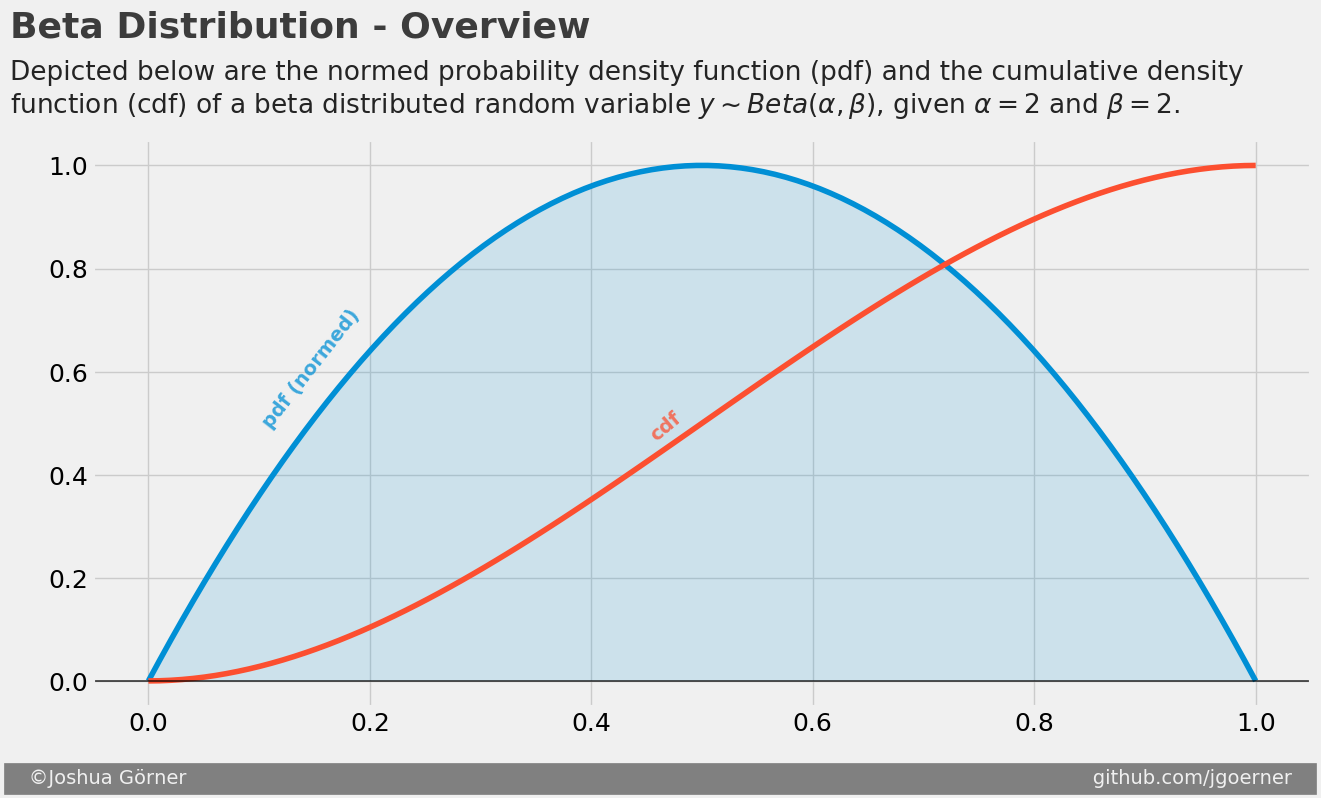

In [2]:
# %load ../src/beta/01_general.py

***
## Parameters

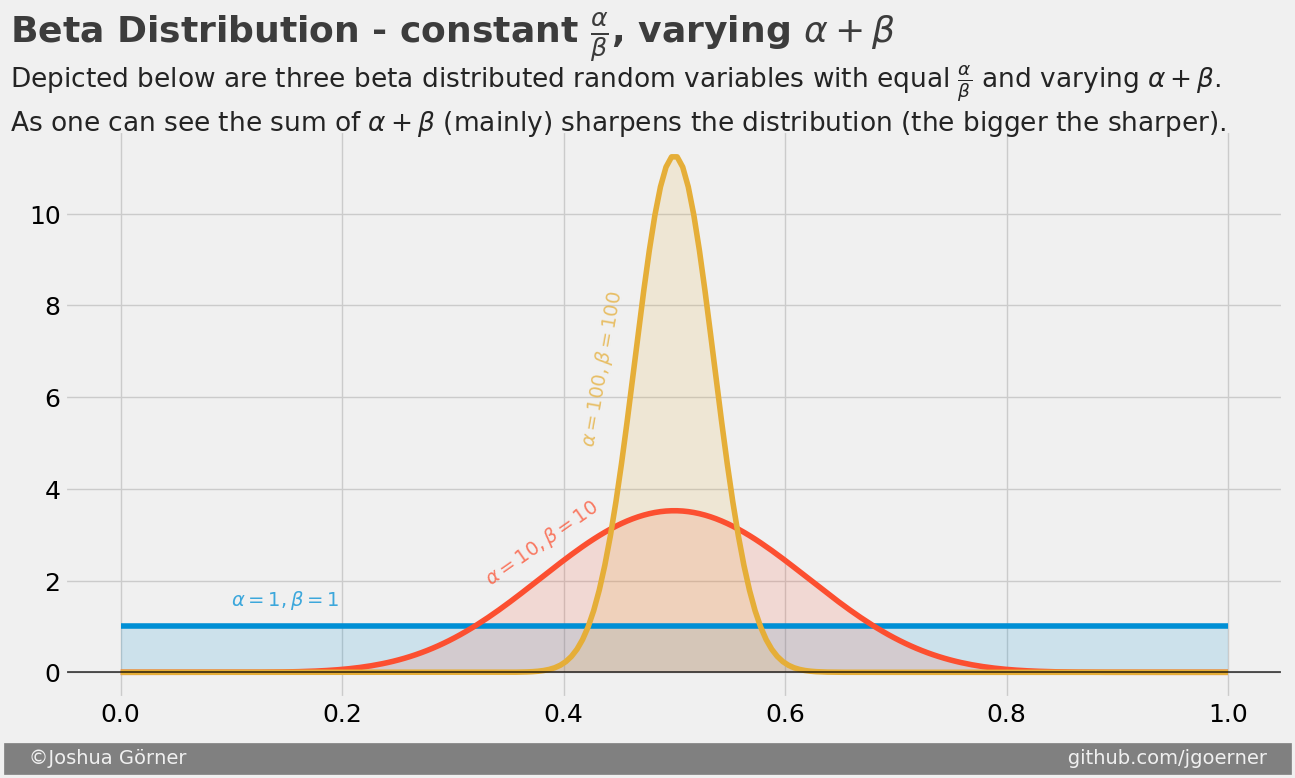

In [4]:
# %load ../src/beta/02_sum.py

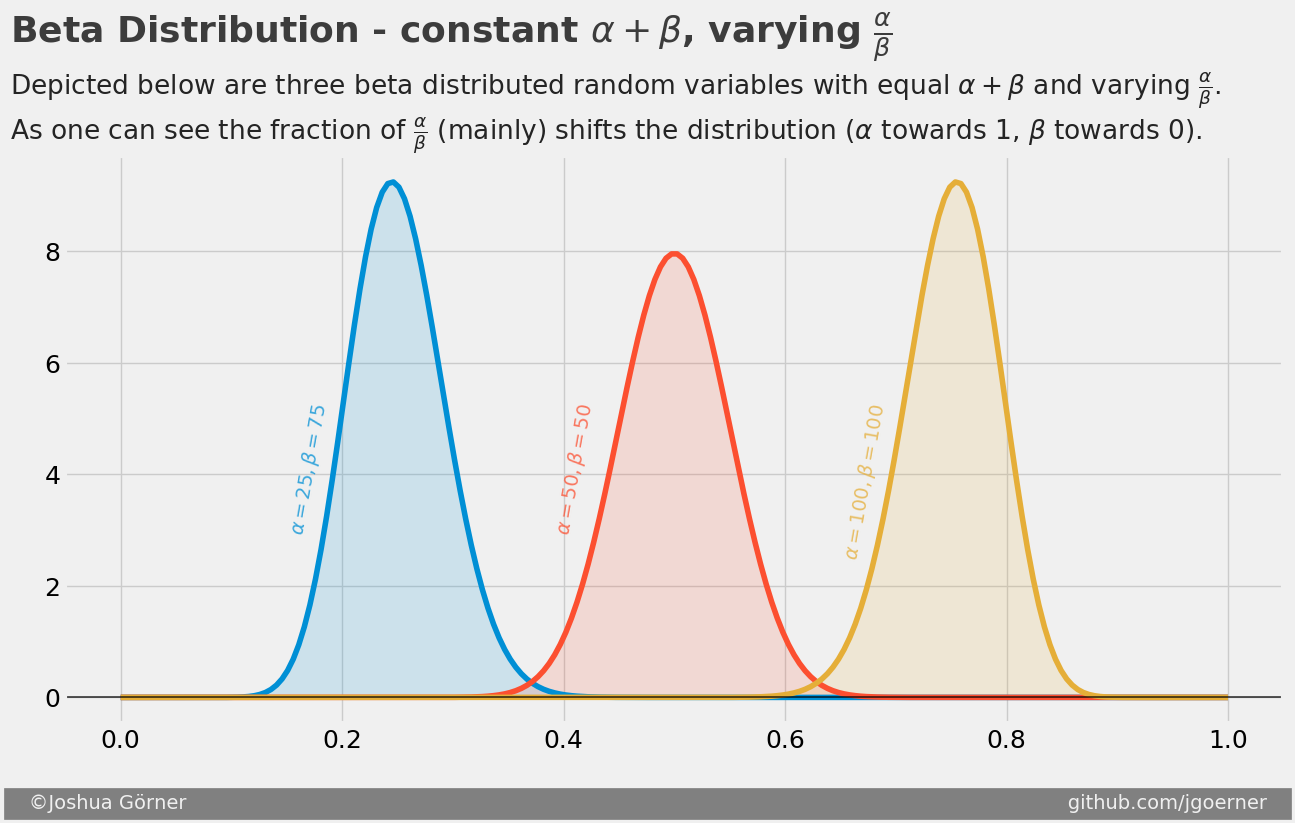

In [6]:
# %load ../src/beta/03_fraction.py

***
## Implementation in Python
Multiple Python packages implement the beta distributions. One of those is the `stats.beta` module from the `scipy` package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) should be read.

### Random Variates
In order to generate a random sample, the function `rvs` should be used.

In [7]:
from scipy.stats import beta

# draw a single sample
print(beta.rvs(a=2, b=2), end="\n\n")

# draw 10 samples
print(beta.rvs(a=2, b=2, size=10))

0.202724954909



[ 0.42141707  0.76444644  0.46058477  0.88009737  0.86962786  0.37648098

  0.3136299   0.68533078  0.64412816  0.08252218]


### Probability Density Function
The probability density function can be accessed via the `pdf` function. Like the `rvs` method, the `pdf` function allows for adjusting the parameter $\alpha$ and $\beta$:

pdf(X=x) = 1.26

pdf(X=y) = 0.9599999999999999


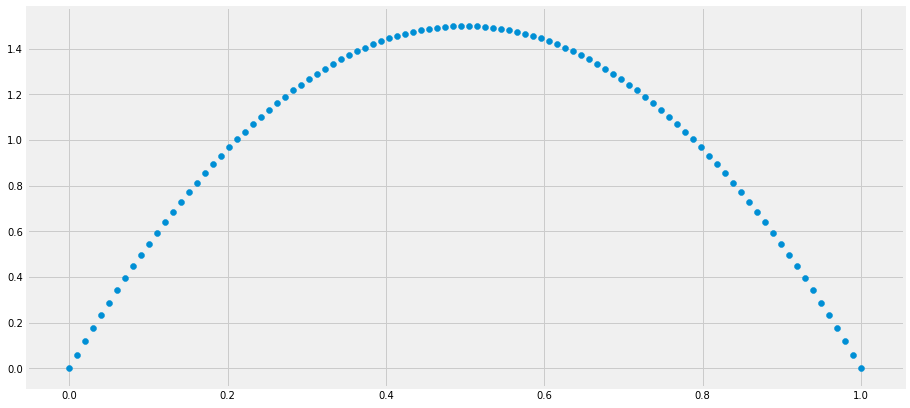

In [8]:
from scipy.stats import beta

# additional import for plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14, 7)

# relative likelihood of x and y
x = 0.3
y = 0.8
print("pdf(X=x) = {}\npdf(X=y) = {}".format(beta.pdf(a=2, b=2, x=x), beta.pdf(a=2, b=2, x=y)))

# continuous pdf for the plot
x_s = np.linspace(0, 1, 100)
y_s = beta.pdf(a=2, b=2, x=x_s)
plt.scatter(x_s, y_s);

### Cumulative Probability Density Function
The cumulative density function is useful when a "real" probability has to be calculated. It can be accessed via the `cdf` function:

In [9]:
from scipy.stats import beta

# probability of x less or equal 0.3
print("P(X <0.3) = {:.3}".format(beta.cdf(a=2, b=2, x=0.3)))

# probability of x in [-0.2, +0.2]
print("P(-0.2 < X < 0.2) = {:.3}".format(beta.cdf(a=2, b=2, x=0.2) - beta.cdf(a=2, b=2, x=-0.2)))

P(X <0.3) = 0.216

P(-0.2 < X < 0.2) = 0.104


***
## Infering $\alpha$  and $\beta$ - MCMC
If neither $\alpha$ nor $\beta$ are given, they be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'

100%|██████████| 100500/100500 [00:46<00:00, 2165.55it/s]


95% of sampled mus are between 60.465 and 92.646

95% of sampled mus are between 80.863 and 123.848


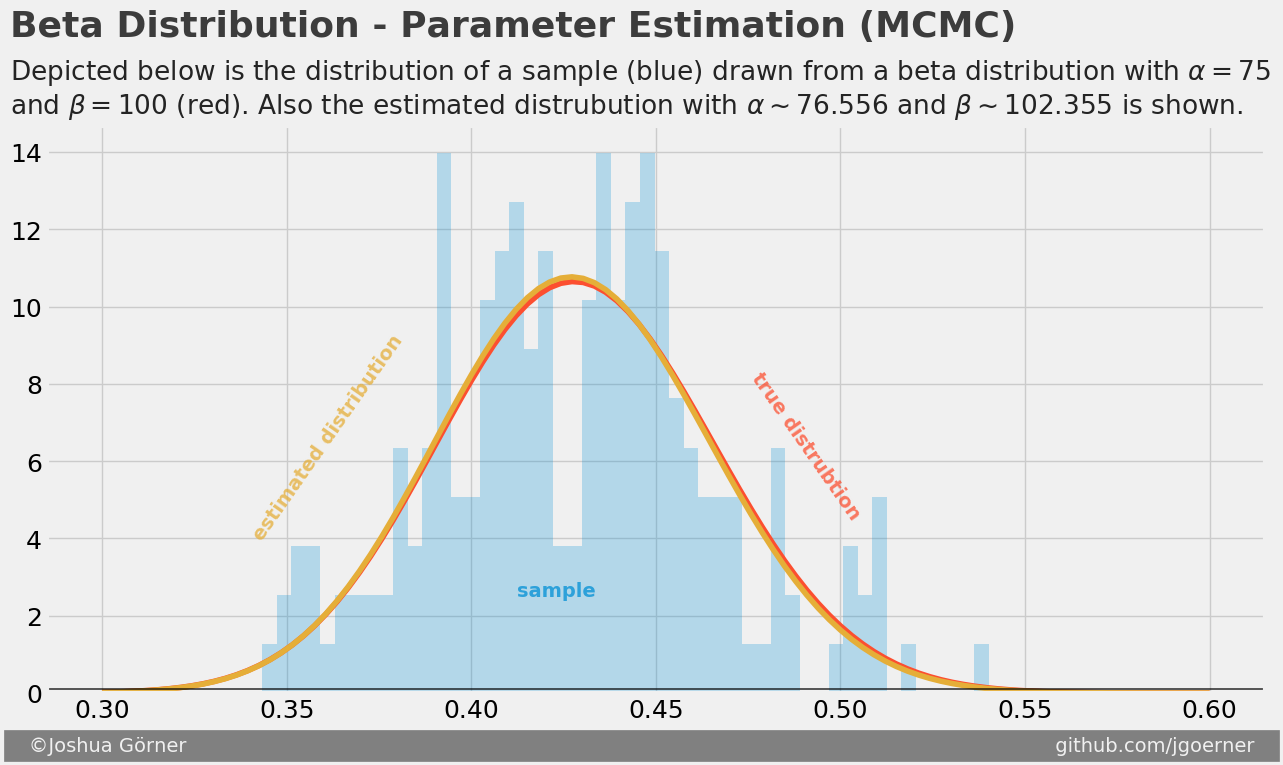

In [2]:
# %load ../src/beta/04_MCMC_estimation.py